In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from utils import encode_label_dice, get_label_info
from PIL import Image

# Prototype encoding function

### This is what the image looks like

In [ ]:
label_info = get_label_info("data/IDDA/class_dict.csv")

In [ ]:
rgb = image = Image.open("data/IDDA/test/@277522.685@110569.687@Town10@ClearNoon@audi@1608238698@0.9997447110635136@1.0007584795349076@1.5735750198364258@160536@.jpg")

In [ ]:
rgb

### And this is what the label looks like

In [ ]:
label = Image.open("data/IDDA/test_labels/@277522.685@110569.687@Town10@ClearNoon@audi@1608238698@0.9997447110635136@1.0007584795349076@1.5735750198364258@160536@.png").convert('RGB')

In [ ]:
label

### We want to build a one-hot-encoded image that looks something like this, for each of the 11 classes

In [ ]:
class_mask = np.equal(label, (1, 0, 0)).all(axis=2)

In [ ]:
class_image = np.ones(class_mask.shape)*class_mask

In [ ]:
plt.imshow(class_image)

In [ ]:
class_image

### This is a first prototype of the encoding function

In [ ]:
def encode_label_IDDA_dice(label):
    class_map = [11, 1, 4, 11, 5, 3, 6, 6, 7, 10, 2, 11, 8, 11, 11, 11, 0, 11, 11, 11, 9, 11, 11, 11, 1, 11, 11]
    
    # Convert PIL.Image to np.array
    label = np.array(label)

    # Build the first layer of the encoded image (void class)
    ohe_image = np.zeros(label.shape[:2] + (12,))
    
    idda_classes = 27
    
    for i in range(idda_classes):
        depth_class_color = (i, 0, 0)
        class_mask = np.equal(label, depth_class_color).all(axis=2)
        ohe_image[:,:,class_map[i]] += np.ones(class_mask.shape)*class_mask
        
    return ohe_image

### Let's test it

In [ ]:
encoded_label = encode_label_IDDA_dice(image)

In [ ]:
encoded_label.shape

In [ ]:
encoded_label[:,:,1].nonzero()

### Now let's visualize all the channels and see if they correspond to each class label

In [ ]:
class_names = ["bycicle", "building", "car", "pole", "fence", "pedestrian", "road", "sidewalk", "tsign", "sky", "vegetation", "void"]

In [ ]:
fig, ax = plt.subplots(4, 3, figsize=(15, 12))
ax = ax.ravel()

for i, class_name in enumerate(class_names):
    ax[i].imshow(encoded_label[:, :, i])
    ax[i].set_title(f"{class_name} mask")
plt.show()

### Everything looks fine, let's check that indeed each pixel is labelled

In [ ]:
(encoded_label.sum(axis=2)==0).any()

## Success :)

# Let's check a first encoded label from pre_encode_labels.py

In [ ]:
filename = "data/IDDA/train_labels/@277340.761@110573.411@Town10@ClearNoon@audi@1608200215@0.9997773867748094@0.9991243107168336@1.248753547668457@126614@.npz"

encoded_label = np.load(filename)["a"]

In [ ]:
encoded_label.shape

In [ ]:
encoded_label.nonzero()

In [ ]:
fig, ax = plt.subplots(4, 3, figsize=(15, 12))
ax = ax.ravel()

for i, class_name in enumerate(class_names):
    ax[i].imshow(encoded_label[:, :, i])
    ax[i].set_title(f"{class_name} mask")
plt.show()

In [ ]:
(encoded_label.sum(axis=2)==0).any()

## Check encodings for CamVid.py

In [ ]:
filename = "data/CamVid/test_labels/0001TP_008550_L.npy"

encoded_label = np.load(filename)

In [ ]:
encoded_label.shape

In [ ]:
encoded_label.nonzero()

In [ ]:
fig, ax = plt.subplots(4, 3, figsize=(15, 12))
ax = ax.ravel()

for i, class_name in enumerate(class_names):
    ax[i].imshow(encoded_label[i, :, :])
    ax[i].set_title(f"{class_name} mask")
plt.show()

In [ ]:
(encoded_label.sum(axis=0)==0).any()

## Check image-label file discrepancy

In [ ]:
import glob

train_imgs = sorted(glob.glob("data/IDDA/train/*.jpg"))
train_lbls = sorted(glob.glob("data/IDDA/train_labels/*.npz"))
train_lbls_orig = sorted(glob.glob("data/IDDA/train_labels/*.png"))

test_imgs = sorted(glob.glob("data/IDDA/test/*.jpg"))
test_lbls = sorted(glob.glob("data/IDDA/test_labels/*.npz"))
test_lbls_orig = sorted(glob.glob("data/IDDA/test_labels/*.png"))

val_imgs = sorted(glob.glob("data/IDDA/val/*.jpg"))
val_lbls = sorted(glob.glob("data/IDDA/val_labels/*.npz"))
val_lbls_orig = sorted(glob.glob("data/IDDA/val_labels/*.png"))

In [ ]:
print(len(train_imgs) == len(train_lbls) == len(train_lbls_orig))
print(len(test_imgs) == len(test_lbls) == len(test_lbls_orig))
print(len(val_imgs) == len(val_lbls) == len(val_lbls_orig))

In [ ]:
len(train_imgs)

In [ ]:
len(train_lbls)

In [ ]:
len(train_lbls_orig)

In [ ]:
print(train_imgs[0].split("/")[-1])
print(train_lbls[0].split("/")[-1])
print(train_lbls_orig[0].split("/")[-1])
print("==========================")
print(train_imgs[-1].split("/")[-1])
print(train_lbls[-1].split("/")[-1])
print(train_lbls_orig[-1].split("/")[-1])

In [ ]:
print(val_imgs[0].split("@")[1:3])
print(val_lbls[0].split("@")[1:3])
print(val_lbls_orig[0].split("@")[1:3])
print("==========================")
print(val_imgs[-1].split("@")[1:3])
print(val_lbls[-1].split("@")[1:3])
print(val_lbls_orig[-1].split("@")[1:3])

In [ ]:
print(test_imgs[0].split("@")[1])
print(test_lbls[0].split("@")[1])
print(test_lbls_orig[0].split("@")[1])
print("==========================")
print(test_imgs[-1].split("@")[1])
print(test_lbls[-1].split("@")[1])
print(test_lbls_orig[-1].split("@")[1])

# Imagenet Check

In [ ]:
a = Image.open('../../../../../Downloads/n01440764_tench.jpeg')
a

In [ ]:
np.array(a)/255

In [ ]:
c = []

In [ ]:
a = np.ones((720, 960, 3))
b = np.ones((720, 960, 3))

In [ ]:
c.append(a)
c.append(b)

In [ ]:
len(c)

In [ ]:
c = np.stack(c)

In [ ]:
c.shape

In [ ]:
np.mean(c, axis=(0, 1, 2)).shape

# Visualizing CosineDecayLR

In [ ]:
from torch.nn import Sequential, Linear
from torch.optim import SGD
from torch.optim.lr_scheduler import CosineAnnealingLR, CosineAnnealingWarmRestarts

import matplotlib.pyplot as plt

In [ ]:
epochs = 50
lr = 0.1
model = Sequential(Linear(100, 10))
optimizer = SGD(model.parameters(), lr)
scheduler = CosineAnnealingWarmRestarts(optimizer, T_0=5, T_mult=1, eta_min=0.005)

lrs = []
for i in range(epochs):
    lrs.append(scheduler.state_dict()["_last_lr"])
    scheduler.step()
    
plt.scatter(range(epochs), lrs)
plt.yscale("log")
# plt.yrange([-1, 1])

In [ ]:
lrs

## Pytorch manual random horizontal flip

In [ ]:
from torchvision.transforms import functional as F
import torch
from PIL import Image
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
torch.rand(1) 

In [ ]:
isflip = torch.rand(1) 
p = 0.6
img = Image.open('data/CamVid/train/0006R0_f00930.png')

plt.imshow(np.array(img))
plt.show()

if isflip < p:
    img = F.hflip(img)
    
plt.imshow(np.array(img))
plt.show()

# Tryout color distorsion

In [ ]:
import cv2
import numpy as np
from torchvision.transforms import ColorJitter, RandomApply, RandomGrayscale, Compose, Resize, RandomCrop
import random

class RandomGaussianBlur(object):
    """
    Inspired by SwAV code on github (https://github.com/facebookresearch/swav/blob/master/src/multicropdataset.py)
    """

    def __call__(self, img):
        do_it = np.random.rand() > -1
        if do_it:
            sigma = np.random.rand() * 1.9 + 0.1
            img = cv2.GaussianBlur(np.asarray(img), (23, 23), sigma)

        return img


class ColorDistortion(object):
    """
    Inspired by SwAV code on github (https://github.com/facebookresearch/swav/blob/master/src/multicropdataset.py)
    """

    def __init__(self, strength=1.0):
        self.s = strength

    def __call__(self, img):
        color_jitter = ColorJitter(0.4 * self.s, 0.4 * self.s, 0.4 * self.s, 0.1 * self.s)
        rnd_color_jitter = RandomApply([color_jitter], p=0.8)
        rnd_gray = RandomGrayscale(p=0.2)
        color_distort = Compose([rnd_color_jitter, rnd_gray])
        a = color_distort(img)

        return a



In [ ]:
transforms = Compose([ColorDistortion(), RandomGaussianBlur()])

In [ ]:
plt.figure(figsize=(20, 18))
plt.imshow(transforms(img))

In [ ]:
a.shape

In [ ]:
img = Image.open('data/CamVid/train/0006R0_f00930.png')
lbl = Image.open('data/CamVid/train_labels/0006R0_f00930_L.png')
seed = int(random.random())

img = Resize((920, 780))(img)
lbl = Resize((920, 780))(lbl)

img = RandomCrop((920, 780), seed, pad_if_needed=True)(image)
lbl = RandomCrop((920, 780), seed, pad_if_needed=True)(lbl)

extent = 0, 920, 0, 780
plt.figure(figsize = (10,10))
plt.imshow(np.array(img), interpolation='nearest', extent=extent)
plt.imshow(np.array(lbl), alpha=0.6, interpolation='nearest', extent=extent)
plt.show()



# Checking npz delays

In [ ]:
import numpy as np
import h5py

In [ ]:
lbl = np.load('data/IDDA/test_labels/@277522.685@110569.687@Town10@ClearNoon@audi@1608238698@0.9997447110635136@1.0007584795349076@1.5735750198364258@160536@.npz')['a']

In [ ]:
lbl.shape

In [ ]:
h5f = h5py.File('prova.h5', 'w')
h5f.create_dataset('label', data=lbl, chunks=True)
h5f.close()

In [ ]:
h5f = h5py.File('prova.h5','r')
b = h5f['label'][:]
h5f.close()

# Checking dark images

In [ ]:
from PIL import Image
import matplotlib.pyplot as plt
import numpy as np
from torchvision.transforms import Compose, Normalize, ToTensor, RandomCrop, Resize


normalize = Compose([
    ToTensor(),
    Normalize((0.39068785, 0.40521392, 0.41434407), (0.29652068, 0.30514979, 0.30080369)),
])

In [ ]:
img_light = Image.open('data/CamVid/train/0006R0_f00930.png')
img_dark = Image.open('../../../../../Desktop/train_dusk/0001TP_006690.png')

In [ ]:
img_ligh_norm = np.moveaxis(np.array(normalize(img_light)), 0, -1)
img_dark_norm = np.moveaxis(np.array(normalize(img_dark)), 0, -1)

In [ ]:
fig, ax = plt.subplots(2, 2, figsize=(18, 12))
ax = ax.ravel()
ax[0].imshow(np.array(img_dark))
ax[1].imshow(np.array(img_light))
ax[2].imshow(np.array(img_dark_norm))
ax[3].imshow(np.array(img_ligh_norm))
plt.show()

# Pre resize IDDA images (and numpy.moveaxis)

In [ ]:
import glob
import os
from torchvision.transforms import Resize

data_path = 'data/IDDA'
resize = Resize()

for img_dir in glob.glob(os.path.join(data_path, "*_labels")):
#     if 'labels' in img_dir:
#         continue
    img_list = glob.glob(os.path.join(img_dir, "*.png"))
    for img_file in img_list:
        img = Image.open(img_file)
        print(img_file)
        break
    break

# Check new lr scheduler

In [ ]:
from torch.optim import SGD
import torch

class WarmupLrScheduler(torch.optim.lr_scheduler._LRScheduler):

    def __init__(
            self,
            optimizer,
            warmup_iter=500,
            warmup_ratio=5e-4,
            warmup='exp',
            last_epoch=-1,
    ):
        self.warmup_iter = warmup_iter
        self.warmup_ratio = warmup_ratio
        self.warmup = warmup
        super(WarmupLrScheduler, self).__init__(optimizer, last_epoch)

    def get_lr(self):
        ratio = self.get_lr_ratio()
        lrs = [ratio * lr for lr in self.base_lrs]
        return lrs

    def get_lr_ratio(self):
        if self.last_epoch < self.warmup_iter:
            ratio = self.get_warmup_ratio()
        else:
            ratio = self.get_main_ratio()
        return ratio

    def get_main_ratio(self):
        raise NotImplementedError

    def get_warmup_ratio(self):
        assert self.warmup in ('linear', 'exp')
        alpha = self.last_epoch / self.warmup_iter
        if self.warmup == 'linear':
            ratio = self.warmup_ratio + (1 - self.warmup_ratio) * alpha
        elif self.warmup == 'exp':
            ratio = self.warmup_ratio ** (1. - alpha)
        return ratio

    
class WarmupPolyLrScheduler(WarmupLrScheduler):

    def __init__(
            self,
            optimizer,
            power,
            max_iter,
            warmup_iter=500,
            warmup_ratio=5e-4,
            warmup='exp',
            last_epoch=-1,
    ):
        self.power = power
        self.max_iter = max_iter
        super(WarmupPolyLrScheduler, self).__init__(
            optimizer, warmup_iter, warmup_ratio, warmup, last_epoch)

    def get_main_ratio(self):
        real_iter = self.last_epoch - self.warmup_iter
        real_max_iter = self.max_iter - self.warmup_iter
        alpha = real_iter / real_max_iter
        ratio = (1 - alpha) ** self.power
        return ratio

In [ ]:
from torchvision.models import resnet18

model = resnet18()
optimizer = torch.optim.SGD(model.parameters(), 0.025)
scheduler = WarmupPolyLrScheduler(optimizer, 0.9, 93*50, 200, 0.1, 'linear', -1)


In [ ]:
lrs = []
lrs2 = []
for i in range(50):
    for i in range(465):
        lrs.append(scheduler.get_last_lr())
        lrs2.append(scheduler.get_last_lr())
        scheduler.step()
    break

In [ ]:
import matplotlib.pyplot as plt

In [ ]:
plt.plot(lrs)

In [ ]:
a = 0.01

In [ ]:
f'{a:.1f}'

# write camvid images and labels for other repo try

In [ ]:
import glob
import pandas as pd

In [ ]:
imgs_train = sorted(glob.glob('/home/nicola/Documents/uni/MLDL/project/BiSeNet/data/CamVid/train/*')) + sorted(glob.glob('/home/nicola/Documents/uni/MLDL/project/BiSeNet/data/CamVid/val/*'))
lbls_train = sorted(glob.glob('/home/nicola/Documents/uni/MLDL/project/BiSeNet/data/CamVid/train_labels/*.png')) + sorted(glob.glob('/home/nicola/Documents/uni/MLDL/project/BiSeNet/data/CamVid/val/*.png'))

In [ ]:
df_t = pd.DataFrame({'a': imgs_train, 'b': lbls_train})
df_t.to_csv('train.txt',  sep='\t', index=False)

In [ ]:
imgs_val = sorted(glob.glob('/home/nicola/Documents/uni/MLDL/project/BiSeNet/data/CamVid/val/*'))
lbls_val = sorted(glob.glob('/home/nicola/Documents/uni/MLDL/project/BiSeNet/data/CamVid/val_labels/*.png'))

In [ ]:
df_v = pd.DataFrame({'a': imgs_val, 'b': lbls_val})
df_v.to_csv('val.txt', sep='\t', index=False)

In [ ]:
df_t

In [ ]:
imgs_train

# $$\[\textrm{dice\_loss} = 1 - \frac{1}{c}\sum_{i=0}^{c}\frac{\sum_j^N 2y_i^j\hat{y}_i^j + \epsilon}{\sum_j^Ny_i^j + \sum_j^N\hat{y}_i^j + \epsilon}\]$$

# Checkout encode label dice

In [ ]:
from utils import encode_label_dice, get_label_info, reverse_one_hot
from PIL import Image
import matplotlib.pyplot as plt
import torch

In [ ]:
plt.imshow(np.array(Image.open('data/CamVid/test/0001TP_008910.png')))

In [ ]:
img = Image.open('data/CamVid/test_labels/0001TP_008910_L.png')


In [ ]:
label_info = get_label_info('data/CamVid/class_dict.csv') 
enc = encode_label_dice(img, label_info)

In [ ]:
plt.imshow(enc[4])
plt.show()

In [ ]:
torch.tensor(enc).cuda().shape

In [ ]:
import numpy as np
def convert_class_to_color(img):
    class_to_color = [(0, 128, 192), (128, 0, 0), (64, 0, 128), (192, 192, 128), (64, 64, 128), (64, 64, 0),
                      (128, 64, 128), (0, 0, 192), (192, 128, 128), (128, 128, 128), (128, 128, 0), (0, 0, 0)]

    new_img = np.zeros(img.shape + (3,), dtype=np.uint8)

    img = img.detach().cpu().numpy()
    for r in range(img.shape[0]):
        for c in range(img.shape[1]):
            try:
                color = class_to_color[img[r, c]]
            except Exception as e:
                color = 0
            new_img[r, c] = color

    return new_img

In [ ]:
plt.imshow(convert_class_to_color(reverse_one_hot(torch.tensor(enc).cuda())))

# Reproducing same random crop on both image and label

In [91]:
from utils import encode_label_dice, get_label_info, reverse_one_hot
from PIL import Image
import matplotlib.pyplot as plt
import torchvision.transforms as t
import torch
import random
import numpy as np
import albumentations as a
from albumentations import DualTransform, to_tuple
import cv2
import albumentations.augmentations.functional as F
from albumentations.augmentations import functional 
import math
import glob

In [14]:
class RandomDiscreteScale(DualTransform):
    def __init__(self, scales, interpolation=cv2.INTER_LINEAR, always_apply=False, p=0.5):
        super(RandomDiscreteScale, self).__init__(always_apply, p)
        self.scales = scales
        self.interpolation = interpolation

    def get_params(self):
        return {"scale": random.choice(self.scales)}

    def apply(self, img, scale=0, interpolation=cv2.INTER_LINEAR, **params):
        return F.scale(img, scale, interpolation)

    def apply_to_bbox(self, bbox, **params):
        # Bounding box coordinates are scale invariant
        return bbox

    def apply_to_keypoint(self, keypoint, scale=0, **params):
        return F.keypoint_scale(keypoint, scale, scale)

    def get_transform_init_args(self):
        return {"interpolation": self.interpolation, "scale_limit": to_tuple(self.scale_limit, bias=-1.0)}

In [187]:
# scales = [0.5, 1, 1.25, 1.5, 1.75, 2]
scales = [1, 1.25, 1.5, 1.75, 2]
# scales = [0.5]
height = 720
width = 960
trans = a.Compose([
    a.HorizontalFlip(p=1),
    RandomDiscreteScale(scales, p=1),
        a.PadIfNeeded(height, width, border_mode=cv2.BORDER_WRAP),
    a.RandomCrop(height, width, p=1)
#     RandomResizedCrop(height=400, width=400, p=1)
])

In [188]:
images = glob.glob('data/CamVid/test/*.png')

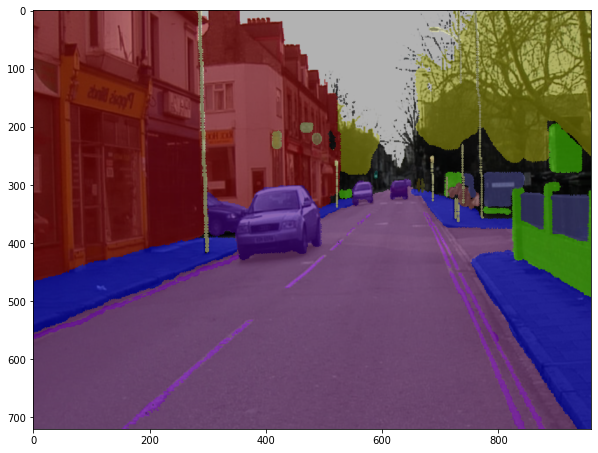

In [213]:
img_file = random.choice(images)
lbl_file = img_file.replace("test", "test_labels").replace('.png', '_L.png')

img = Image.open(img_file)
lbl = Image.open(lbl_file)

res = trans(image=np.array(img), mask=np.array(lbl))

plt.figure(figsize=(10, 10))
plt.imshow(res['image'])
plt.imshow(res['mask'], alpha=0.6)
plt.show()

# Check normalization

In [157]:
# Transformations
normalize = t.Compose([
    t.ToTensor(),
#     t.Normalize((0.39068785, 0.40521392, 0.41434407), (0.29652068, 0.30514979, 0.30080369)),
    t.Normalize((0.485, 0.456, 0.406), (0.229, 0.224, 0.225)),
])

In [158]:
img = Image.open('data/CamVid/test/Seq05VD_f00690.png')
lbl = Image.open('data/CamVid/test_labels/Seq05VD_f00690_L.png')

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


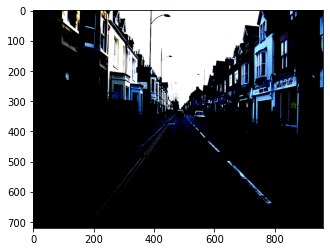

In [159]:
img = np.moveaxis(np.array(normalize(img)), 0, -1)
plt.imshow(img)
plt.show()

# Create gif

In [5]:
import glob
from PIL import Image
images = [Image.open(img) for img in sorted(glob.glob('./runs_data/idda-res101-ohemce/images/*'))]
images[0].save('./runs_data/idda-res101-ohemce/animation.gif', save_all=True, append_images=images[1:], optimize=False, duration=40, loop=0)

## Check IDDA Labels

In [46]:
import glob
from PIL import Image
import os
import numpy as np
import matplotlib.pyplot as plt
import tqdm

In [34]:
colors = [ [0, 0, 0], [70, 70, 70], [190, 153, 153], [72, 0, 90], [220, 20, 60], [153, 153, 153], [157, 234, 50], [128, 64, 128], [244, 35, 232], [107, 142, 35], [0, 0, 142], [102, 102, 156], [220, 220, 0], [250, 170, 30], [180, 165, 180], [111, 74, 0], [119, 11, 32], [0, 0, 230], [255, 0, 0], [152, 251, 152], [70, 130, 180], [230, 150, 140], [81, 0, 81], [0, 0, 0], [150, 100, 100], [45, 60, 150], [0, 0, 70]]
names = ['???', 'Byc', 'Bld', '???', 'Car', '???', '???', 'Pol', "Fnc", '???', "???", "???", "???", "???", "???", "Ped", "Rod", "???", "Sdw", "Sin", "Sky", "???", "???", "???", "???", "Tre", "???", "???", "???", "???", "???"]
idda_names = [ "unlabeled", "building", "fence", "other", "pedestrian", "pole", "roadline", "road", "sidewalk", "vegetation", "car", "wall", "tsign", "tlight", "guardrail", "dynamic", "bicycle", "motorcycle", "rider", "terrain", "sky", "railtrack", "ground", "statics", "bridge", "water", "truck"]

In [35]:
file_folder = '/home/nicola/Documents/uni/MLDL/project/BiSeNet/data/IDDA/train_labels'
image_files = glob.glob(os.path.join(file_folder, "*.png"))

In [51]:
omin = 30
for file in tqdm.tqdm(image_files):
    label = np.array(Image.open(file))
    label_class = label[:, :, 0]
    amin = np.min(label_class)
    if amin == 0:
        print(file)
        break
    if amin < omin:
        omin = amin
    

100%|██████████| 1690/1690 [00:50<00:00, 33.22it/s]


In [52]:
print(omin)

1


In [36]:
image_index = 0

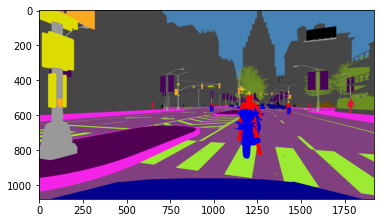

In [54]:
label = np.array(Image.open(image_files[image_index]))
label_class = label[:, :, 0]

colored_label = []

for i in label_class.flatten():
    colored_label.append(colors[i])

plt.imshow(np.array(colored_label).reshape(1080, 1920, 3))
plt.show()


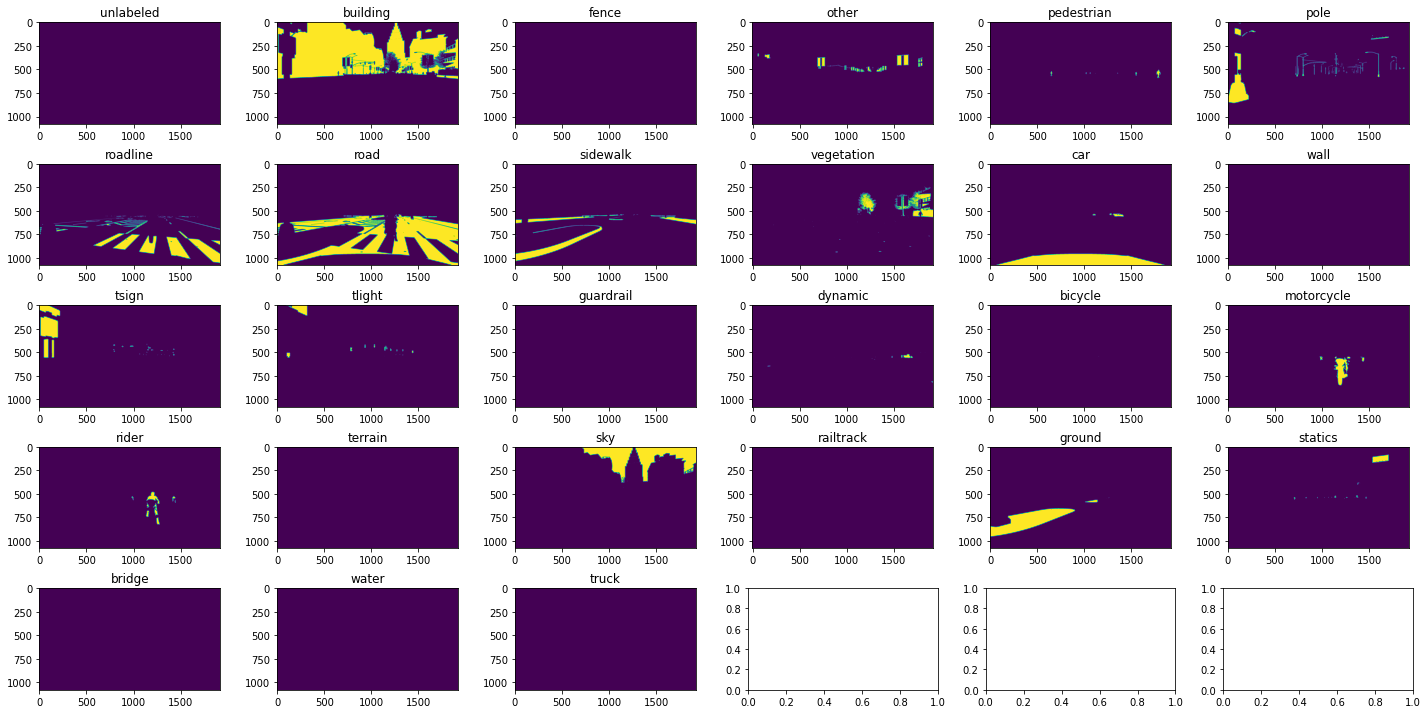

In [57]:
fig, ax = plt.subplots(5, 6, figsize=(20, 10))
ax = ax.ravel()

for i, name in enumerate(idda_names):
    ax[i].imshow(label_class == i)
    ax[i].set_title(name)
plt.tight_layout()
plt.show()